In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import regex as re

## Finding Shared CSVs & Creating Filenames CSV

# Plotting

In [2]:
all_df = pd.read_csv("../data/cleaned_alldata.csv")

In [3]:
kerala_df = pd.read_csv("../data/citizen_states_cleaned/kerala.csv")

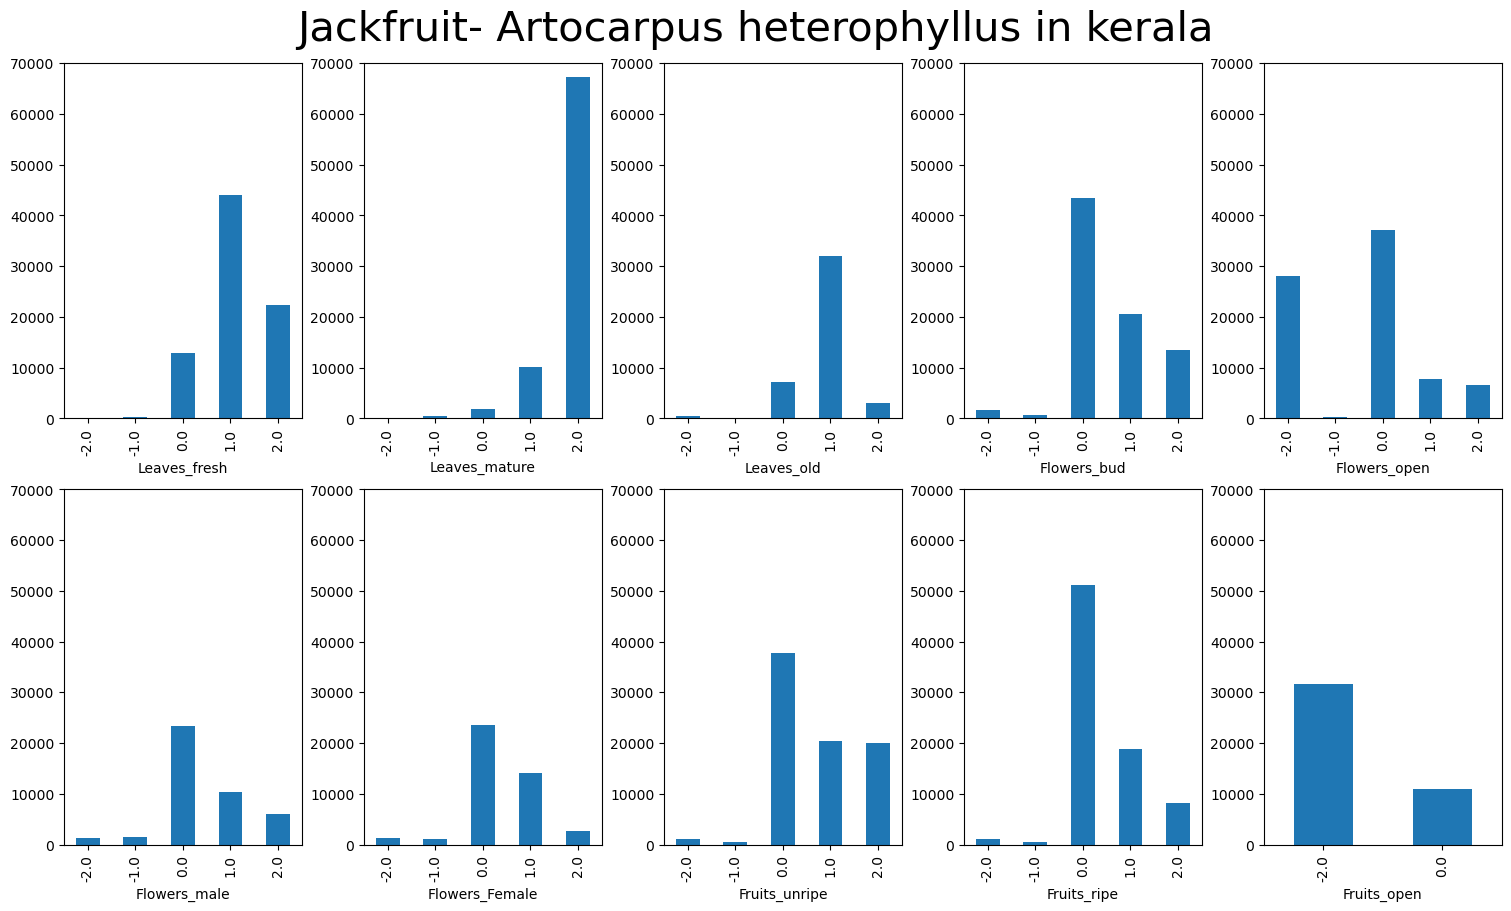

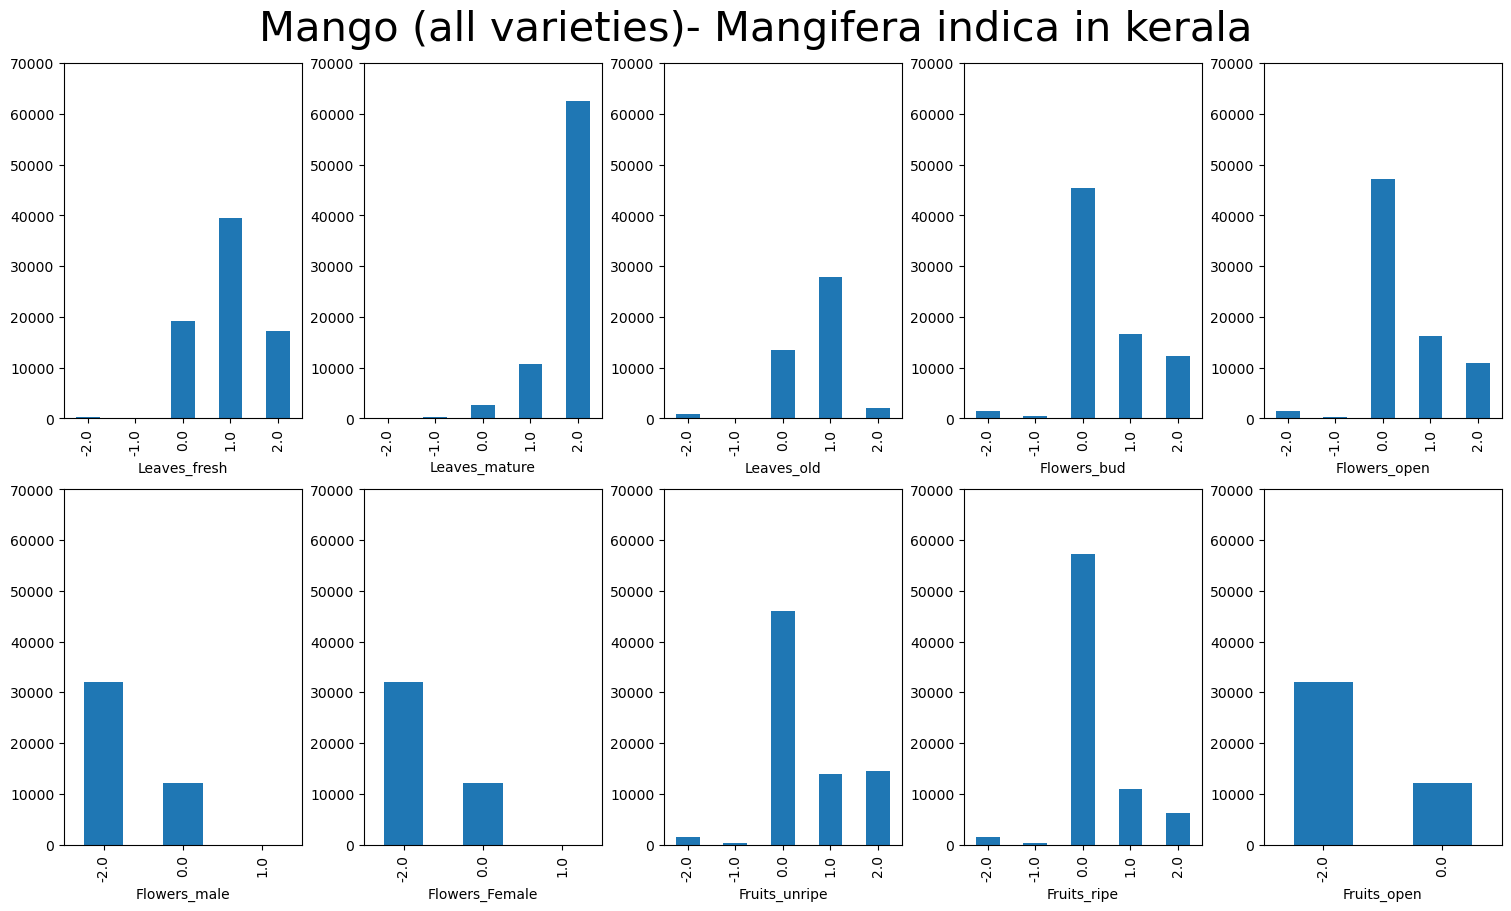

In [78]:
# TODO: Adjust Sizes and Spacing
for species in kerala_df['Species_name'].value_counts().index[:2]:
    fig, ax = plt.subplots(2, 5, constrained_layout=True, figsize=(15, 9))
    for idx, col in enumerate(kerala_df.columns[2:-2]):
        plt.subplot(2, 5, idx+1)
        plt.ylim(0,70000)
        kerala_df[kerala_df['Species_name'] == species][col].value_counts().sort_index().plot.bar()

    fig.suptitle(f"{species} in kerala", fontsize=30)
    plt.show()

# Year Observation Counts table

Year
2014     15319
2015     30449
2016     33771
2017     33574
2018     68034
2019    100766
2020     48615
2021     40817
2022     60194
2023     55662
Name: count, dtype: int64

(0.0, 100766.0)

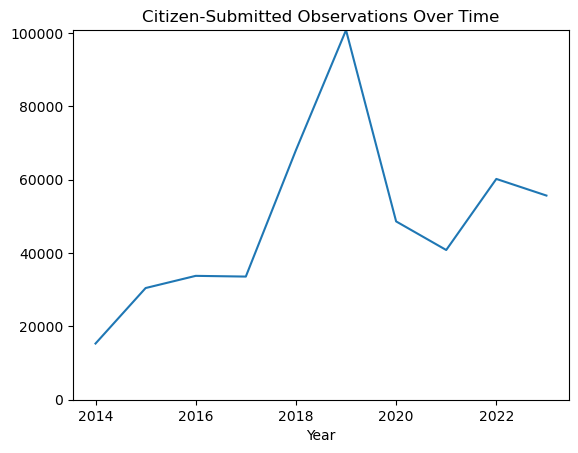

In [275]:
year_counts = kerala_df['Year'].value_counts().sort_index()
display(year_counts)
plt.plot(year_counts.index, year_counts)
plt.title("Citizen-Submitted Observations Over Time")
plt.xlabel("Year")
plt.ylabel("")
plt.ylim(0,max(year_counts))

# Plotting All of Kerala in one plot

<Figure size 1500x1500 with 0 Axes>

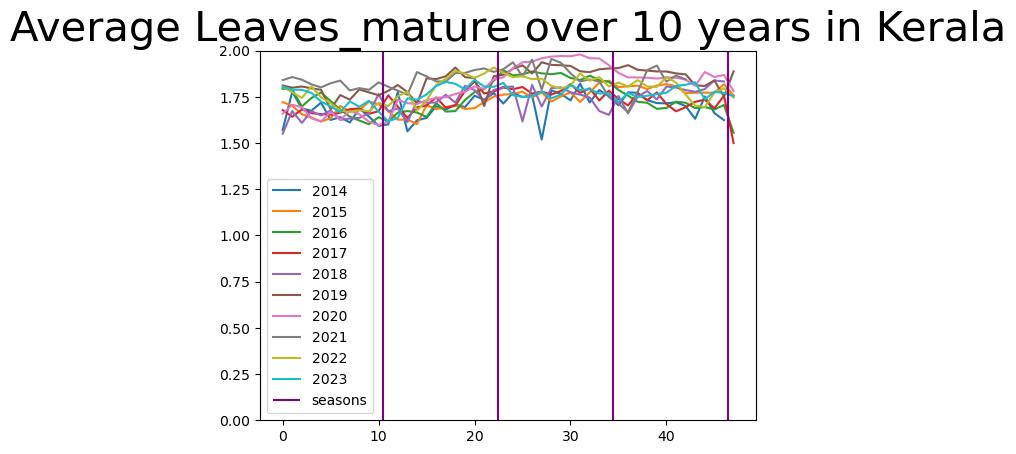

<Figure size 1500x1500 with 0 Axes>

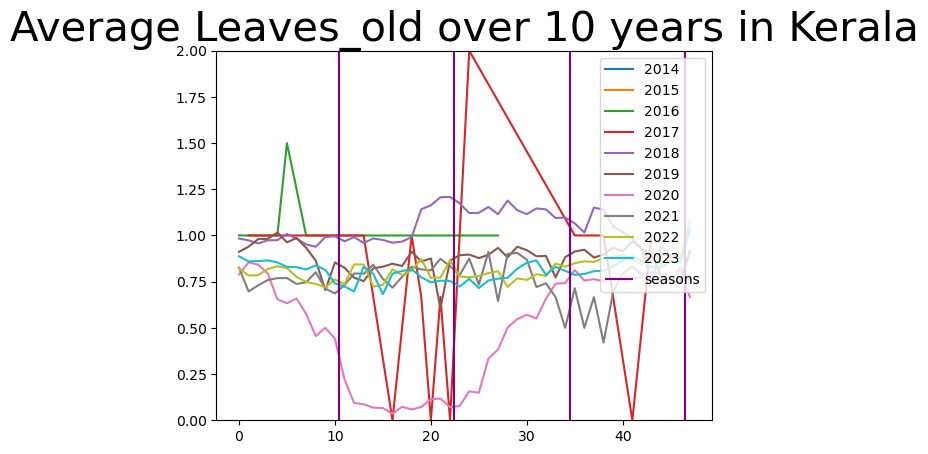

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

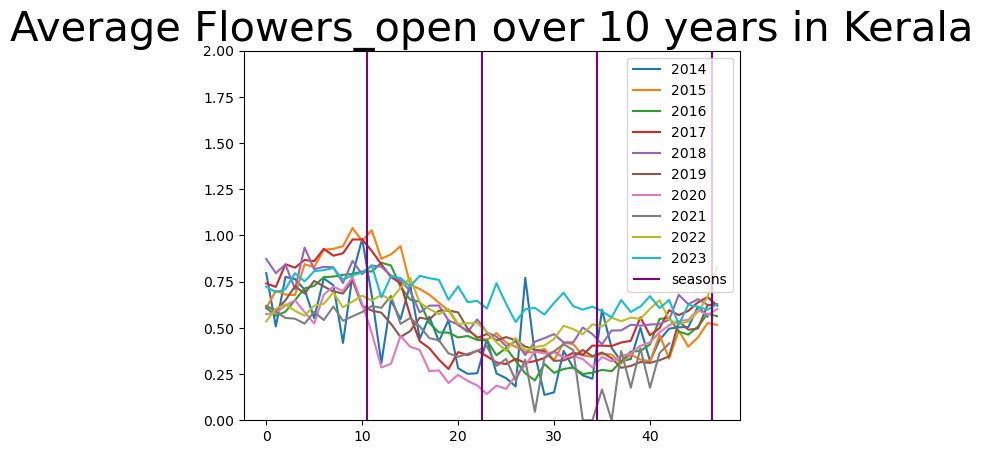

<Figure size 1500x1500 with 0 Axes>

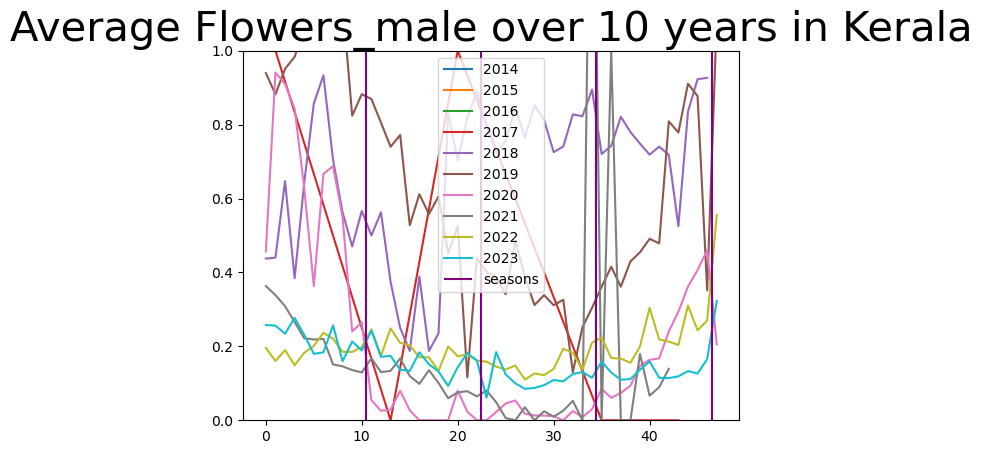

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

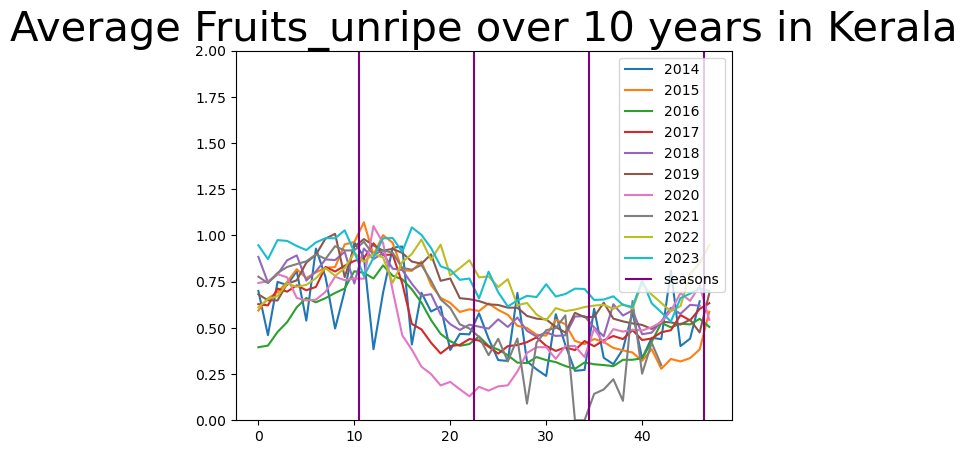

<Figure size 1500x1500 with 0 Axes>

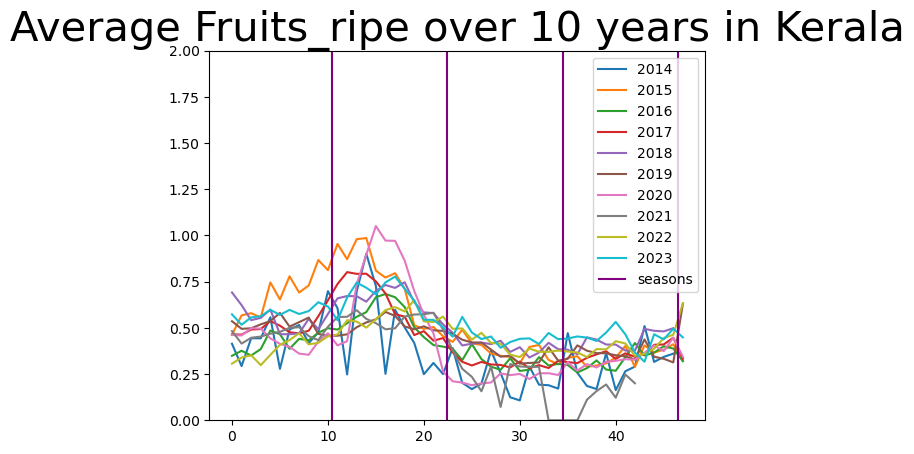

<Figure size 1500x1500 with 0 Axes>

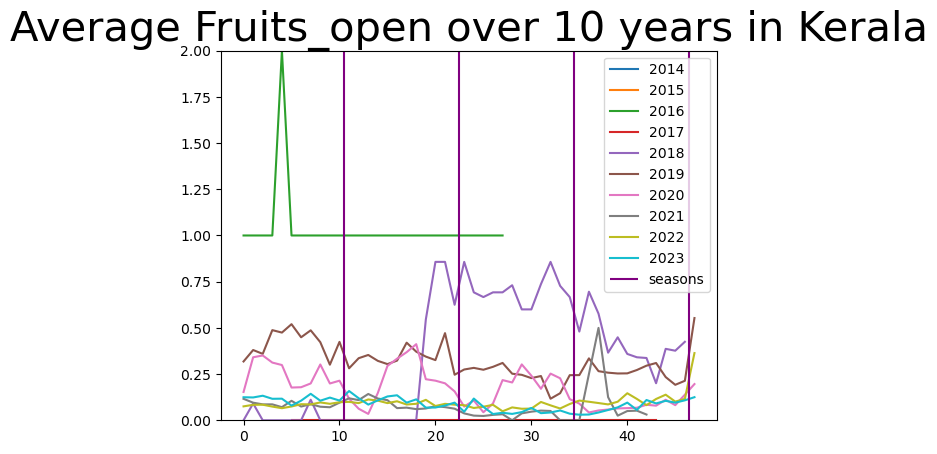

<Figure size 1500x1500 with 0 Axes>

In [267]:
num_weeks = len(kerala_df['Week'].unique())
spring_solstice = 10+(19-31/4*2)/(31/4) # March 19th -> ~10.4516 weeks after start of year
solstices = [spring_solstice+i*num_weeks/4 for i in range(4)]
for feature in kerala_df.columns[2:-2]:
    for idx, year in enumerate(kerala_df['Year'].sort_values().unique()):
        year_df = kerala_df[kerala_df['Year'] == year]
        year_df = year_df[year_df[feature].isin([0,1,2])] # Getting rid of NA values
        year_df = year_df.sort_values('Week')
        plt.plot(np.sort(year_df['Week'].unique()), year_df.groupby(['Week'])[feature].mean(), label=year)
    if feature in ['Flowers_Female','Flowers_male']:
        plt.ylim(bottom=0,top=1)
    else:
        plt.ylim(bottom=0,top=2)
    plt.vlines(x = solstices, ymin = 0, ymax = 2, colors = 'purple', label = 'seasons')
    plt.title(f"Average {feature} over 10 years in Kerala", fontsize=30)
    plt.legend()
    plt.xlabel('Weeks of the Year')
    plt.ylabel(f'Average {feature}')
    plt.figure(figsize=(15,15))
    plt.show()

1. +Vertical Lines to indicate seasons
2. +Plot 10 lines (one for each year) on one graph
3. +Table with observation counts for each year.
4. -Add observations in the title
5. -Add max ylims

# Plotting Each Feature for Trees in Kerala over Time

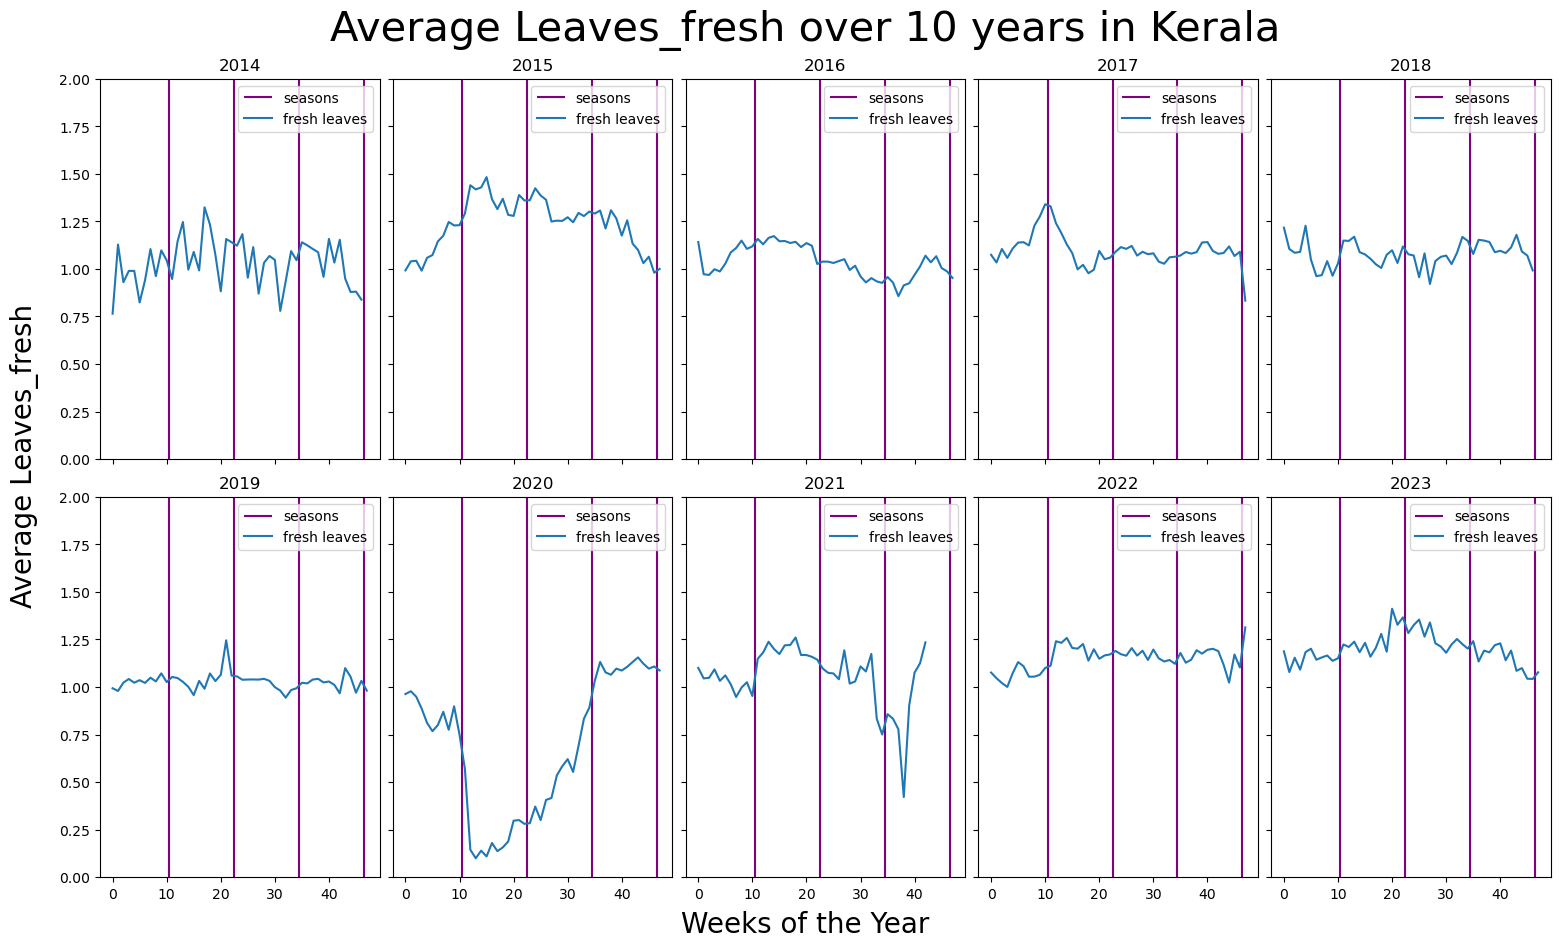

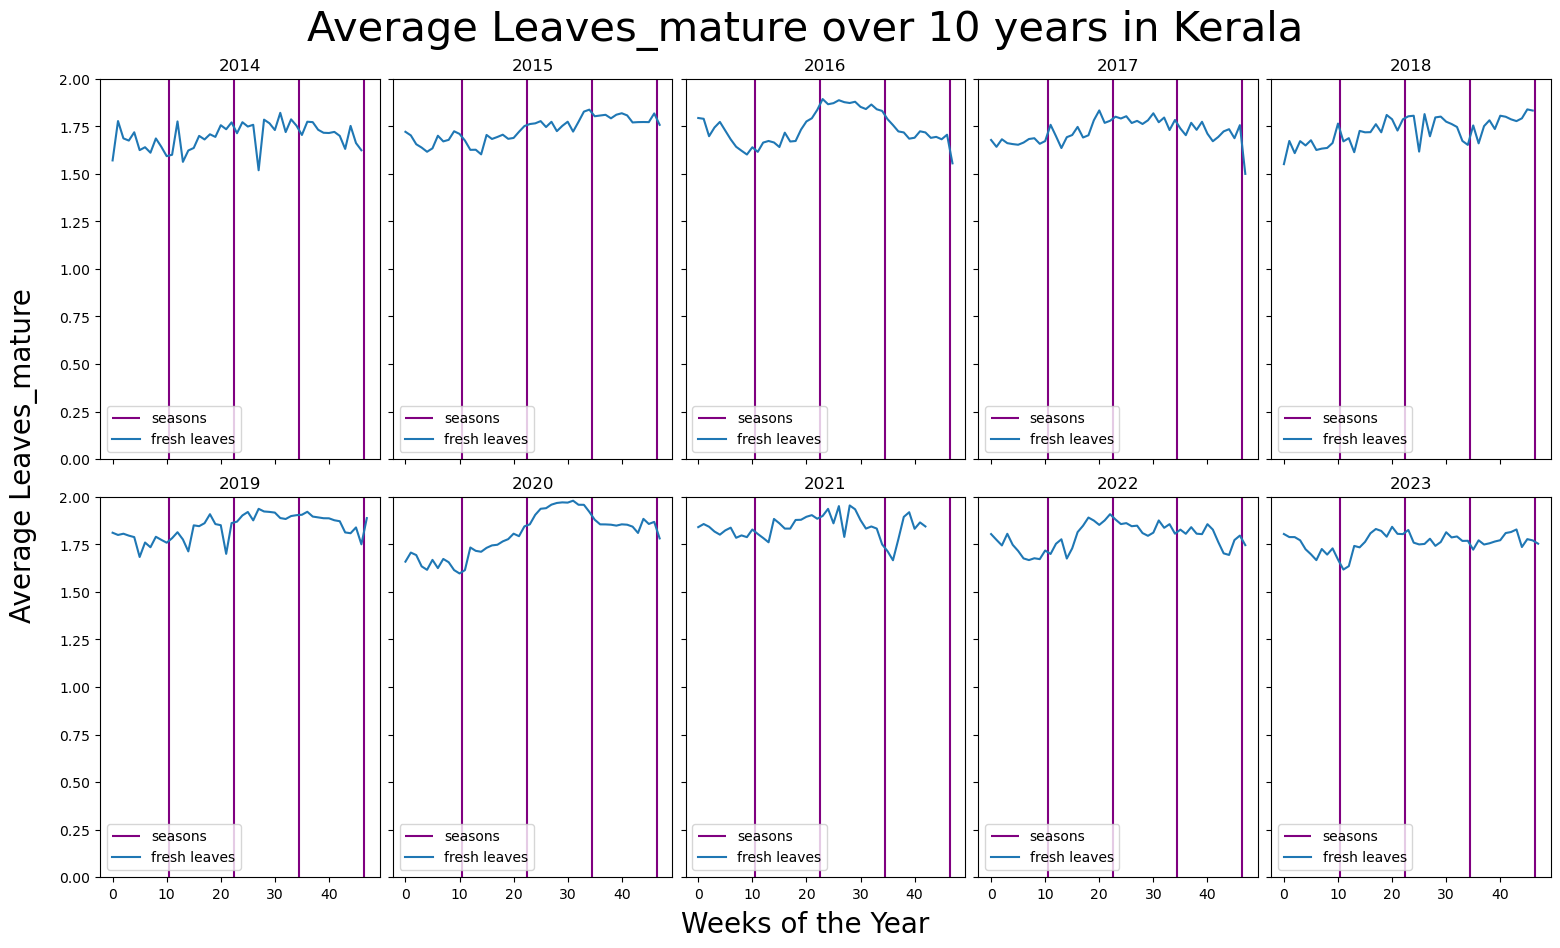

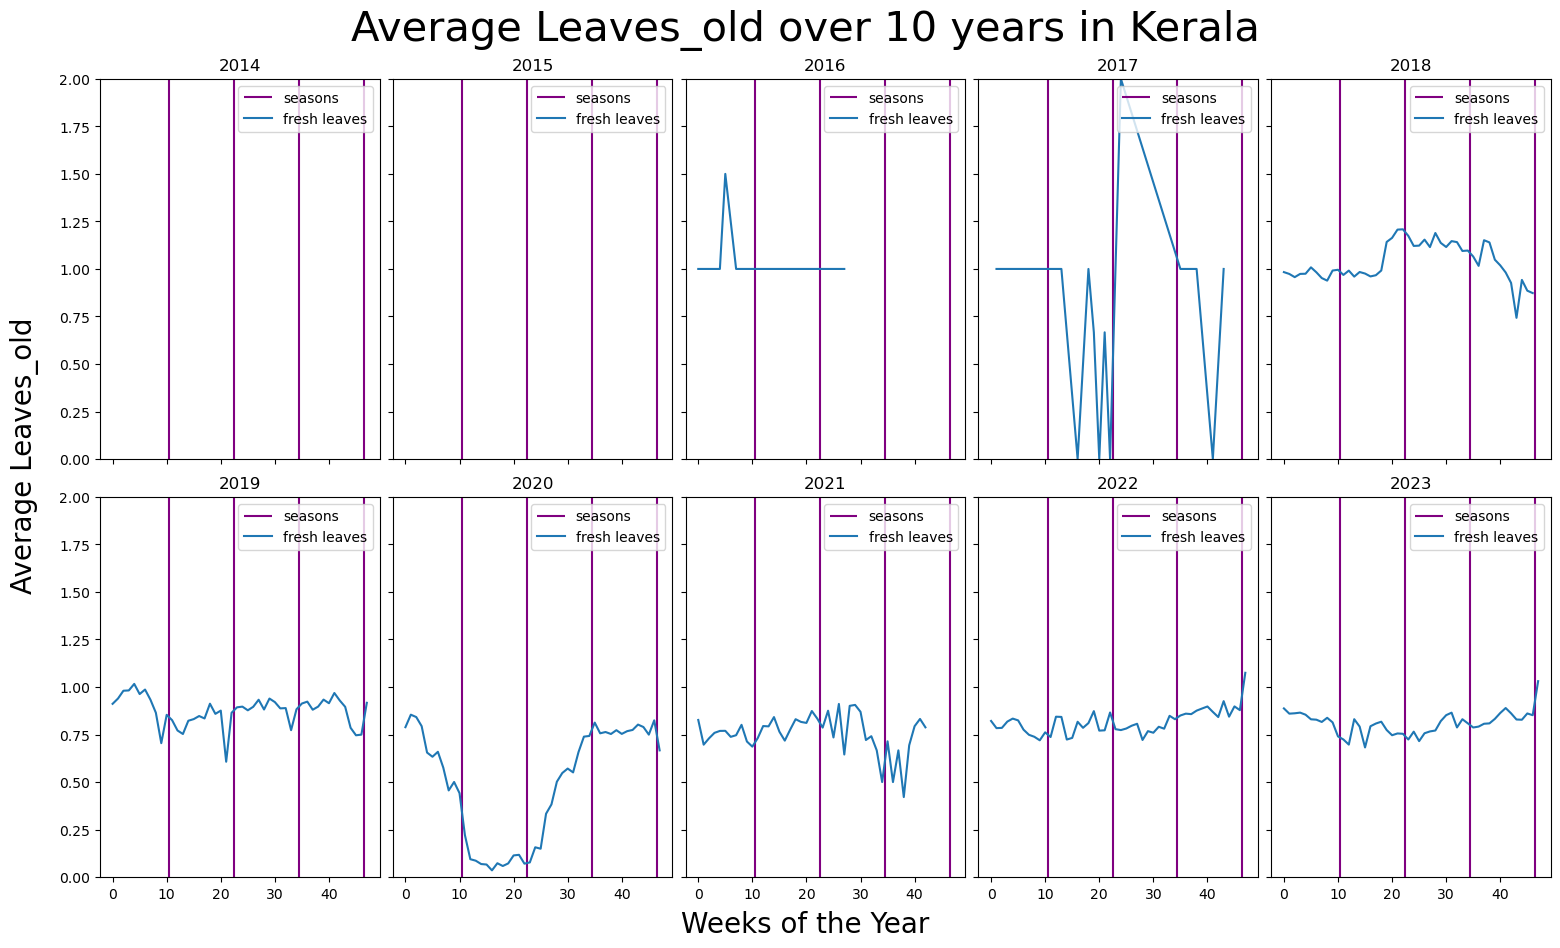

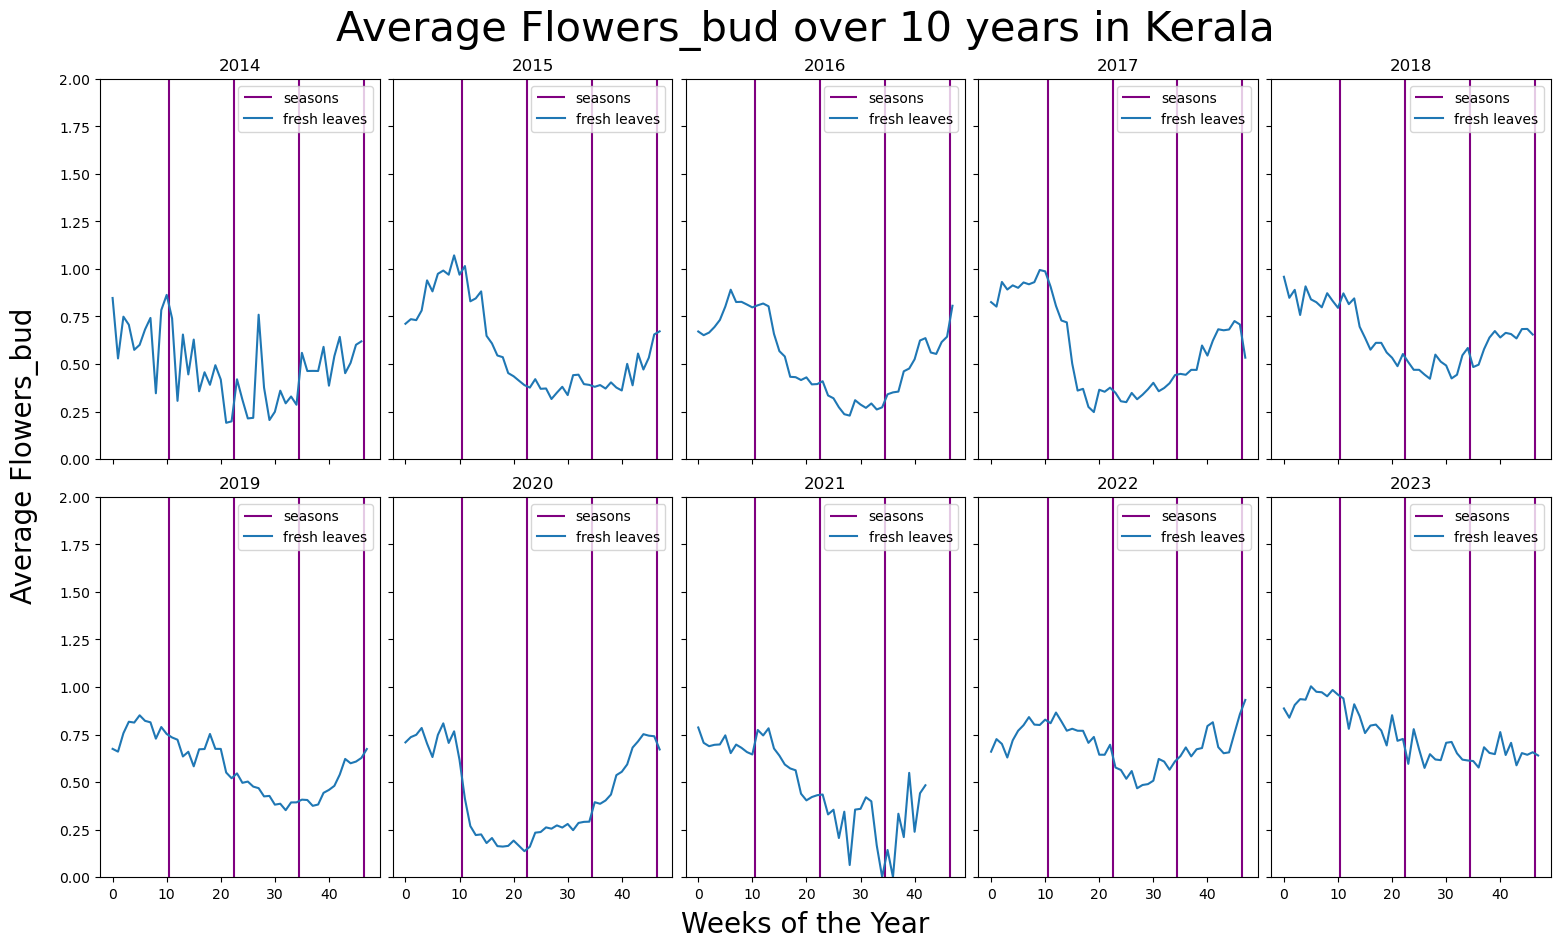

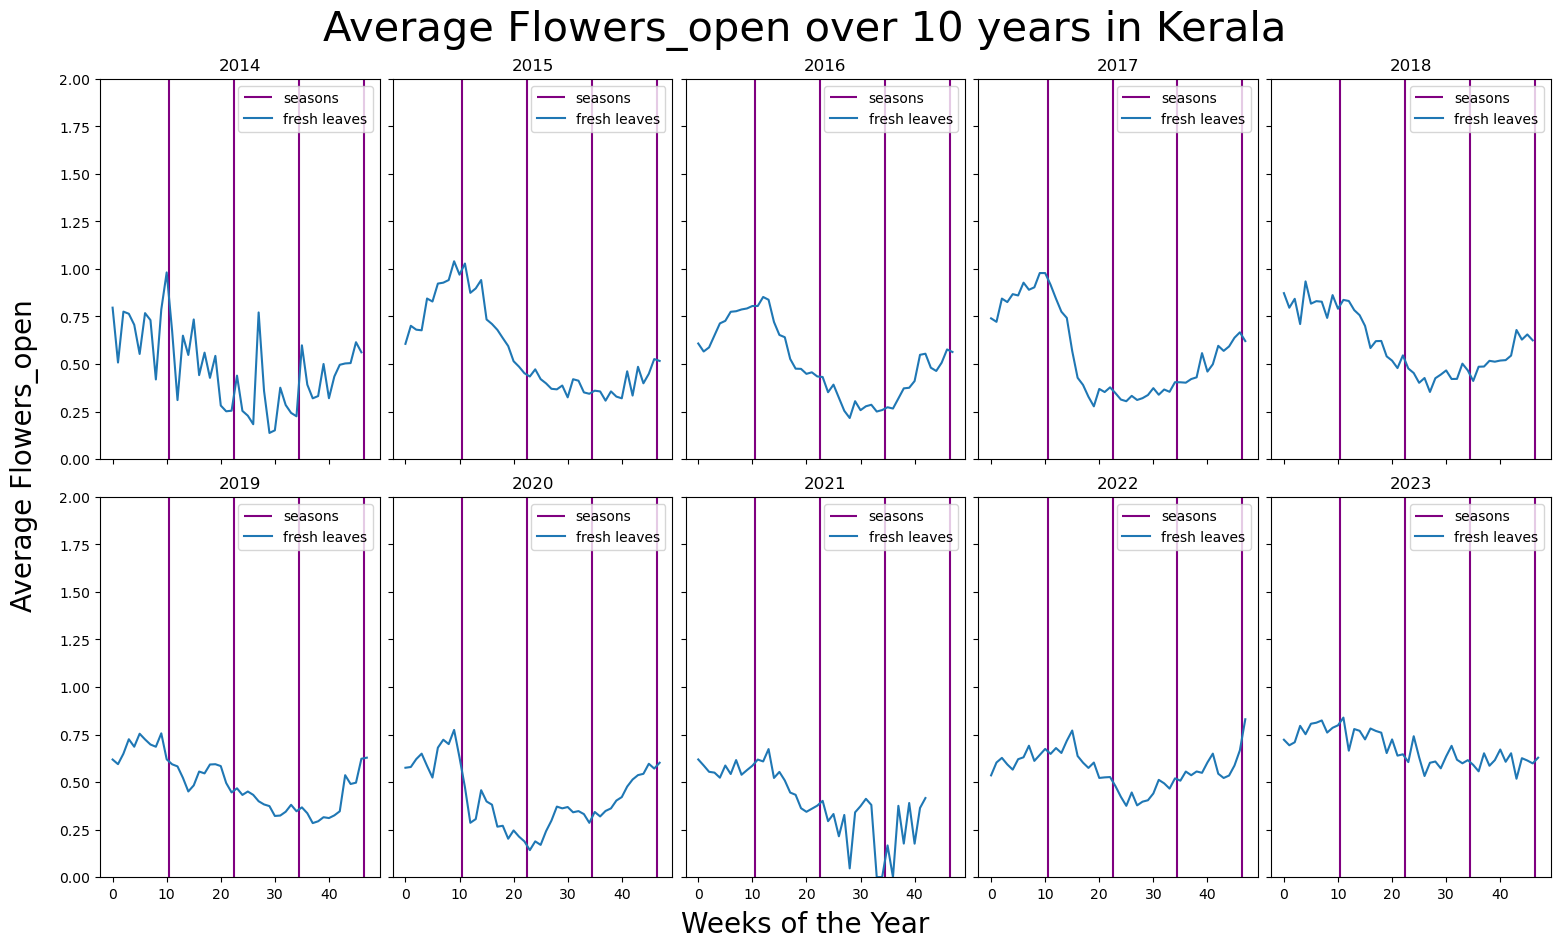

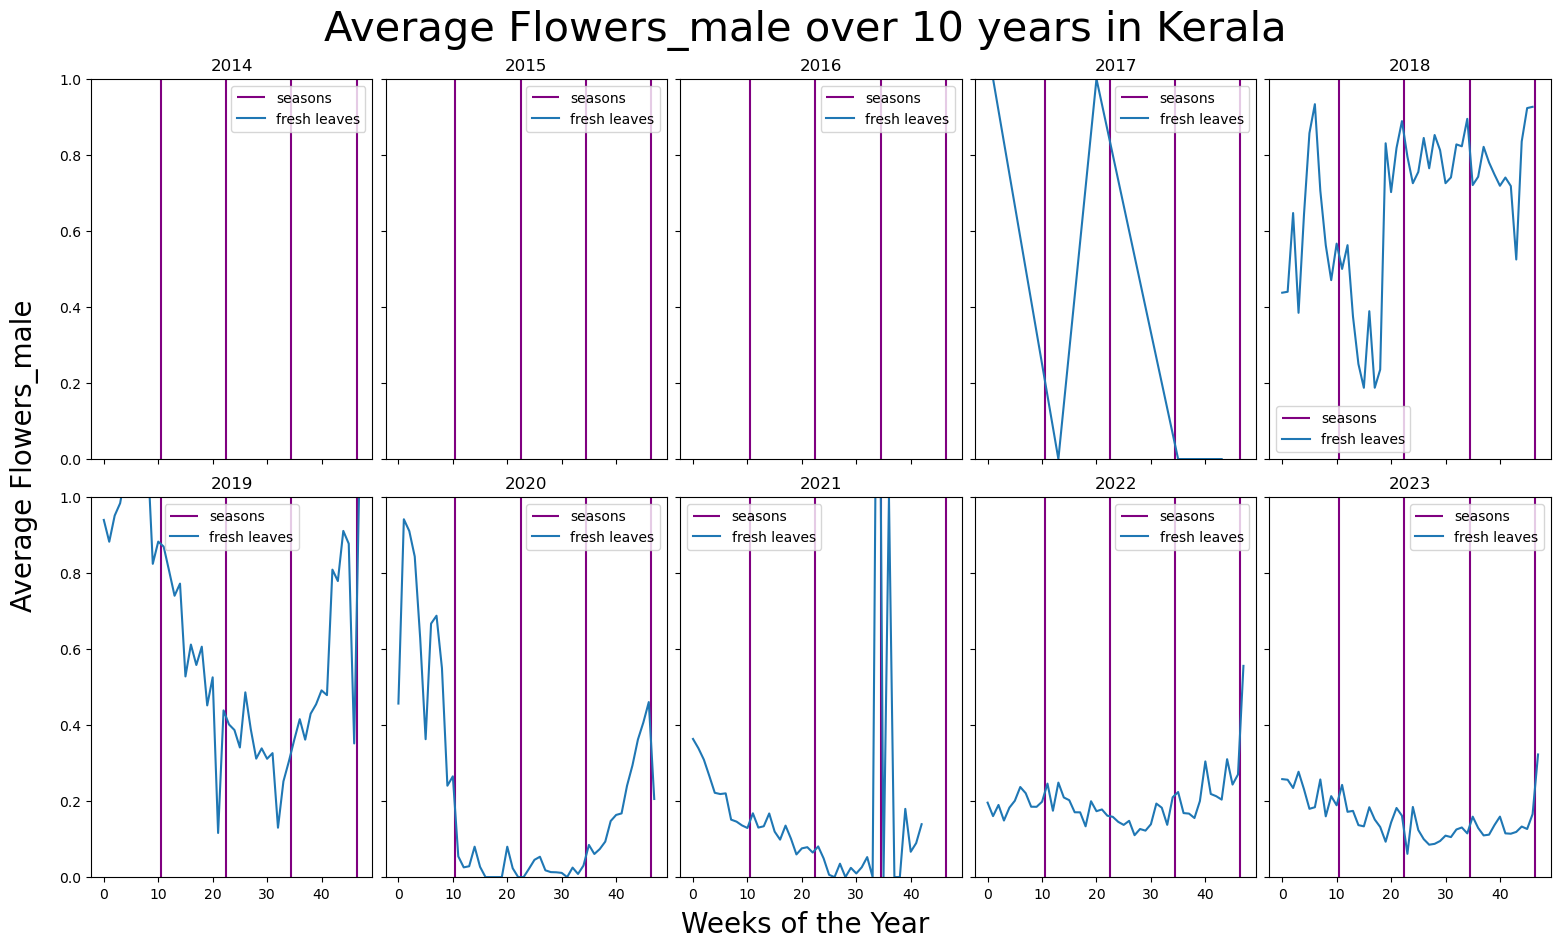

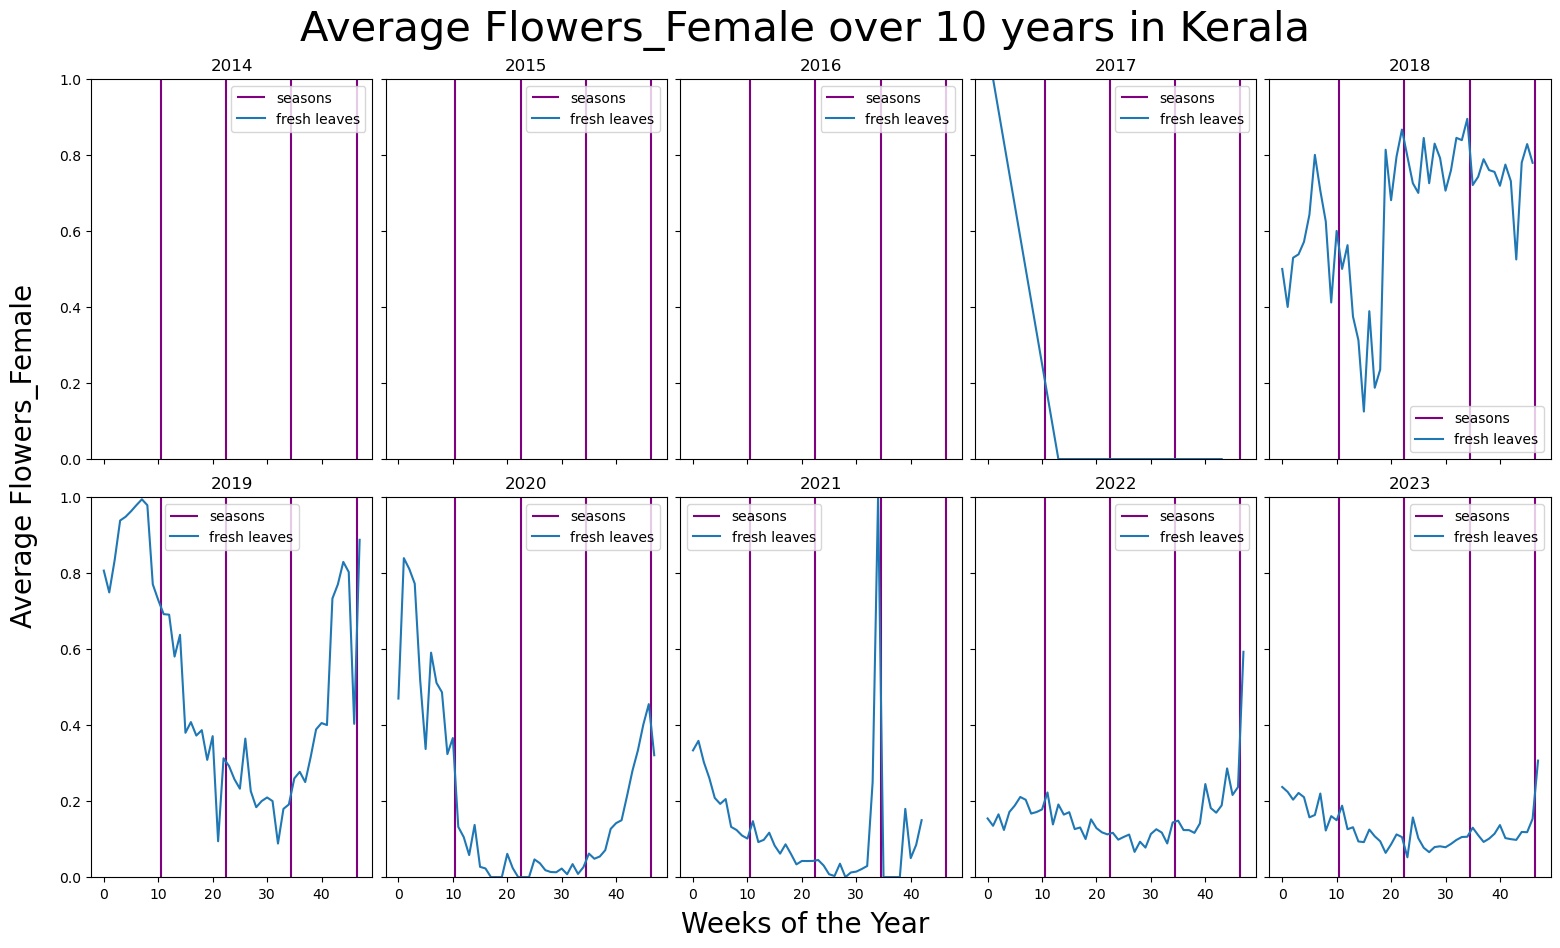

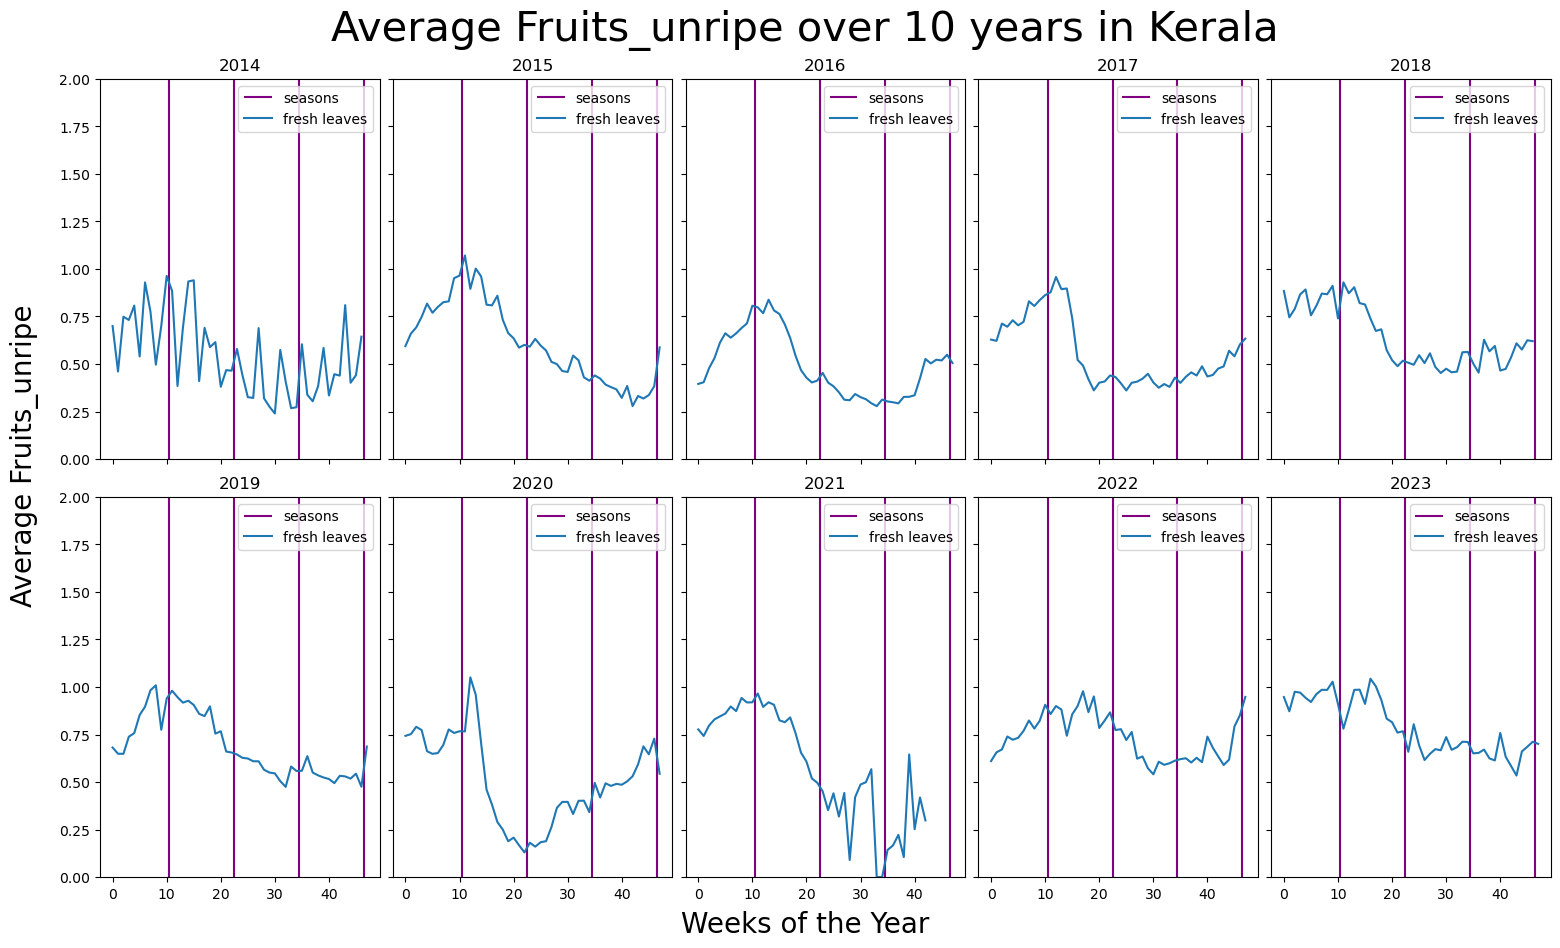

In [272]:
num_weeks = len(kerala_df['Week'].unique())
spring_solstice = 10+(19-31/4*2)/(31/4) # March 19th -> ~10.4516 weeks after start of year
solstices = [spring_solstice+i*num_weeks/4 for i in range(4)]
for feature in kerala_df.columns[2:-2]:
    fig, ax = plt.subplots(2, 5, sharex=True, sharey=True, constrained_layout=True, figsize=(15, 9))
    for idx, year in enumerate(kerala_df['Year'].sort_values().unique()):
        plt.subplot(2, 5, idx+1)
        if feature in ['Flowers_Female','Flowers_male']:
            plt.ylim(bottom=0,top=1)
        else:
            plt.ylim(bottom=0,top=2)
        plt.vlines(x = solstices, ymin = 0, ymax = 2, colors = 'purple', label = 'seasons')
        year_df = kerala_df[kerala_df['Year'] == year]
        year_df = year_df[year_df[feature].isin([0,1,2])] # Getting rid of NA values
        year_df = year_df.sort_values('Week')
        plt.plot(np.sort(year_df['Week'].unique()), year_df.groupby(['Week'])[feature].mean(), label = 'fresh leaves')
        plt.legend()
        plt.title(year)
    fig.suptitle(f"Average {feature} over 10 years in Kerala", fontsize=30)
    fig.text(0.5, -0.03, 'Weeks of the Year', ha='center', fontsize=20)
    fig.text(-0.03, 0.5, f'Average {feature}', va='center', rotation='vertical', fontsize=20)
    plt.show()

# Plotting Each Feature for Jackfruit over Time

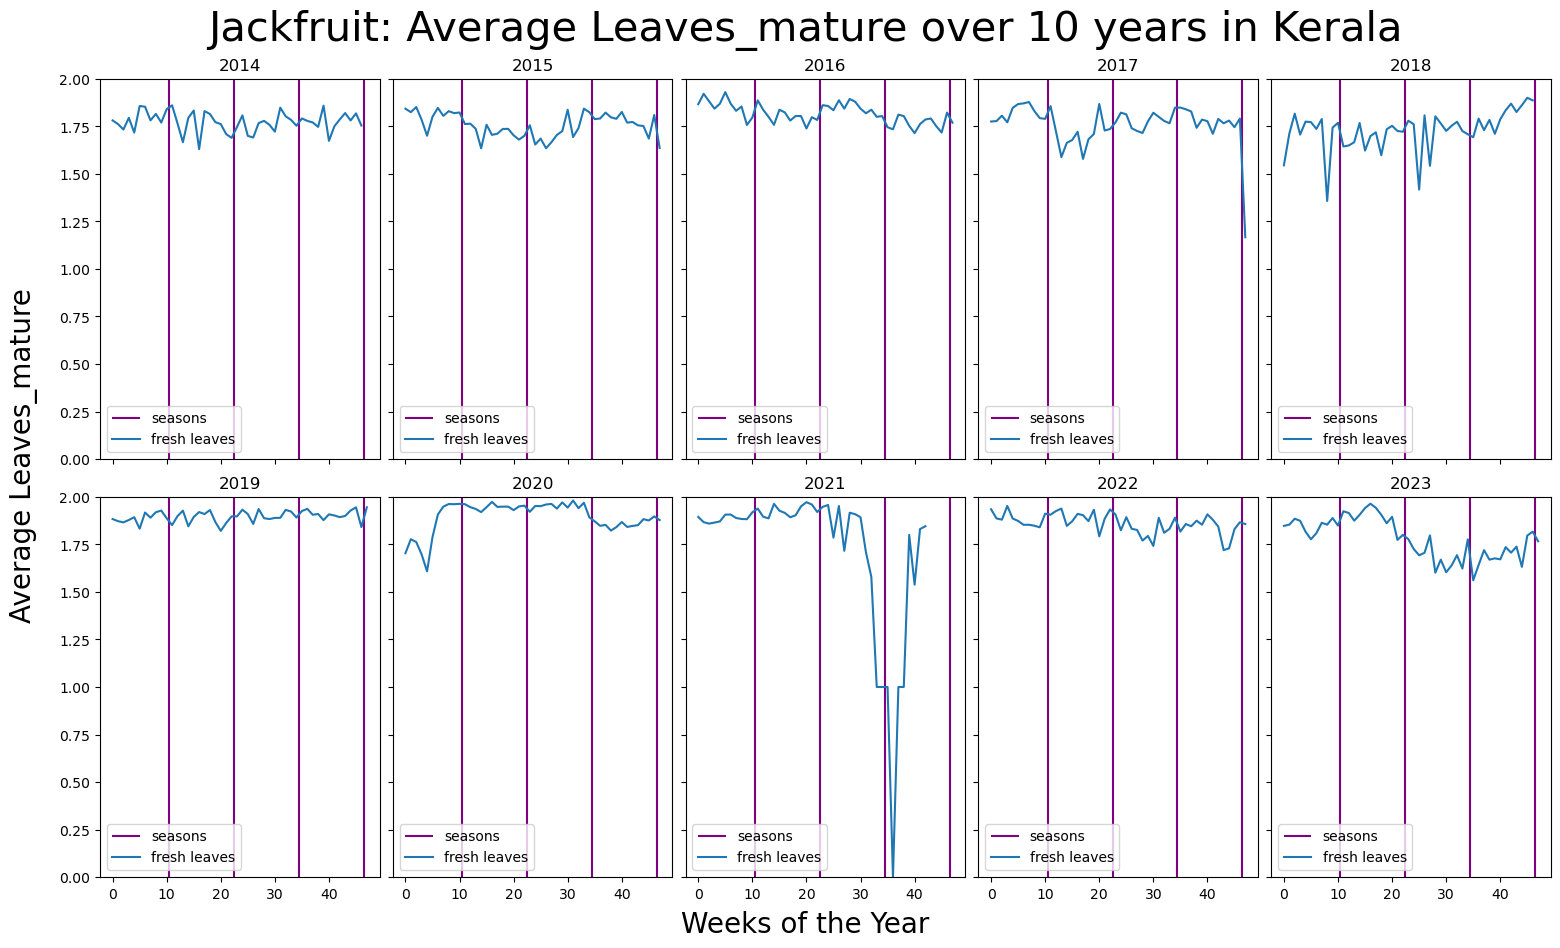

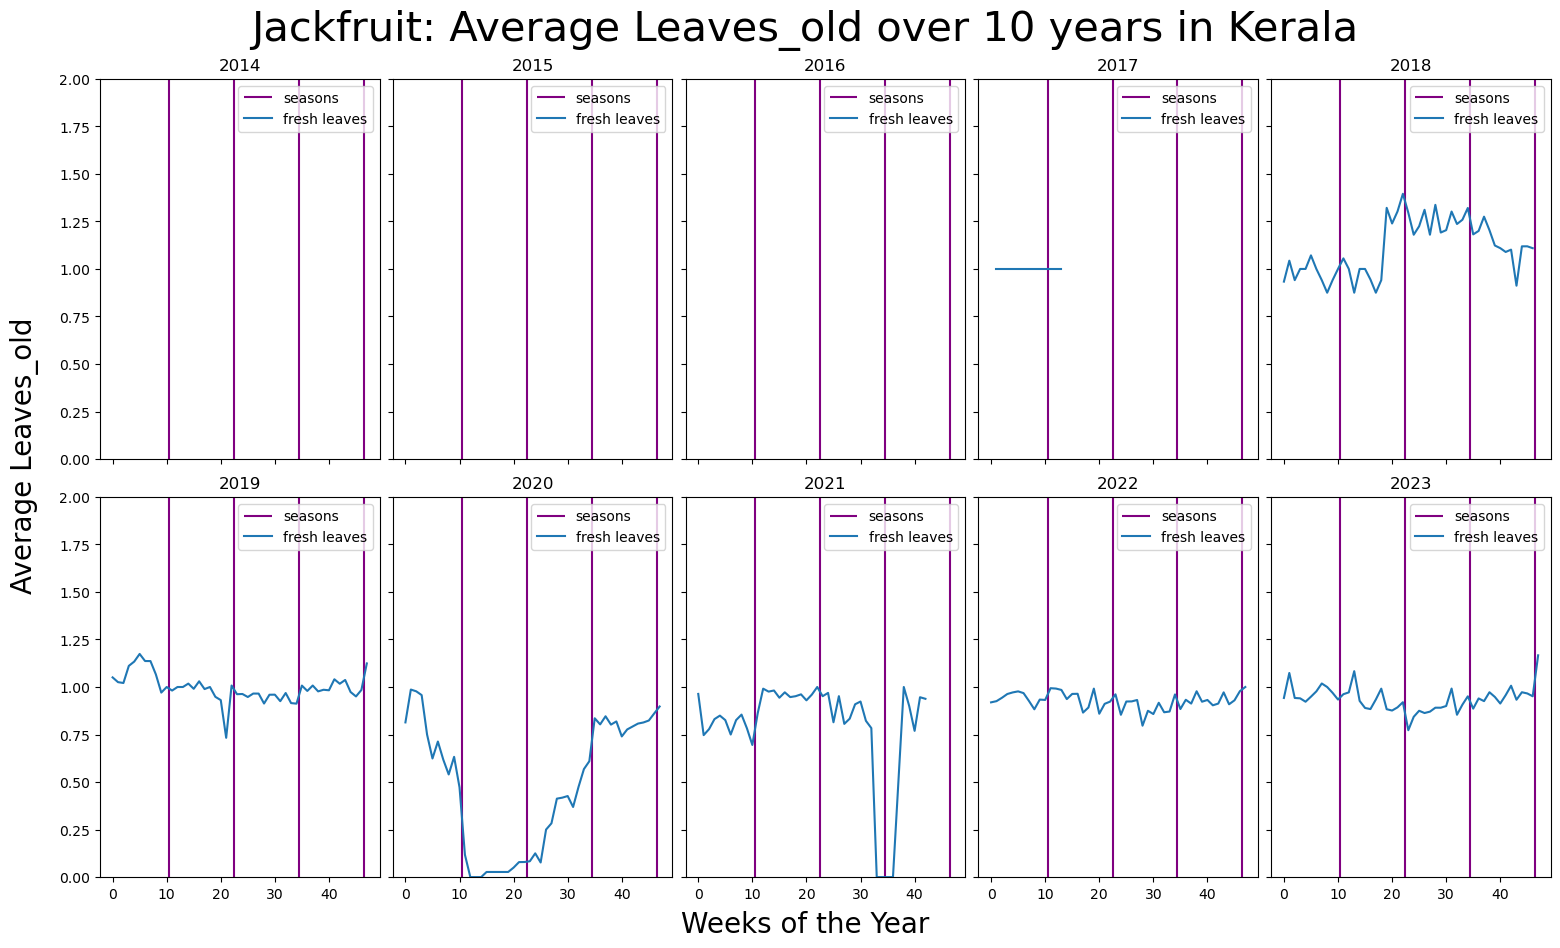

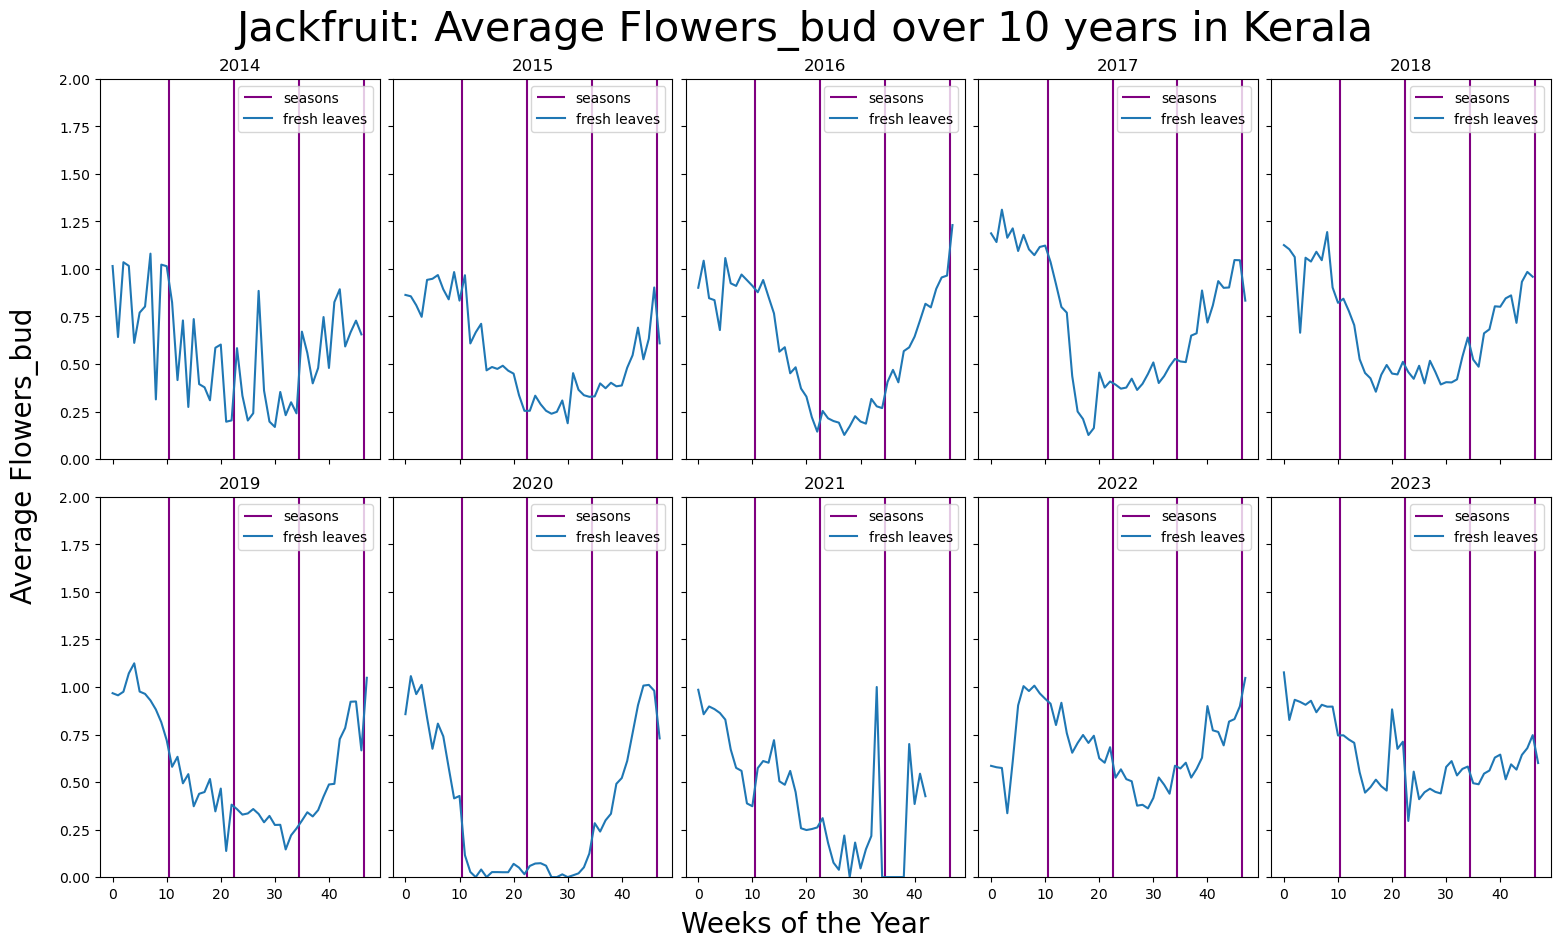

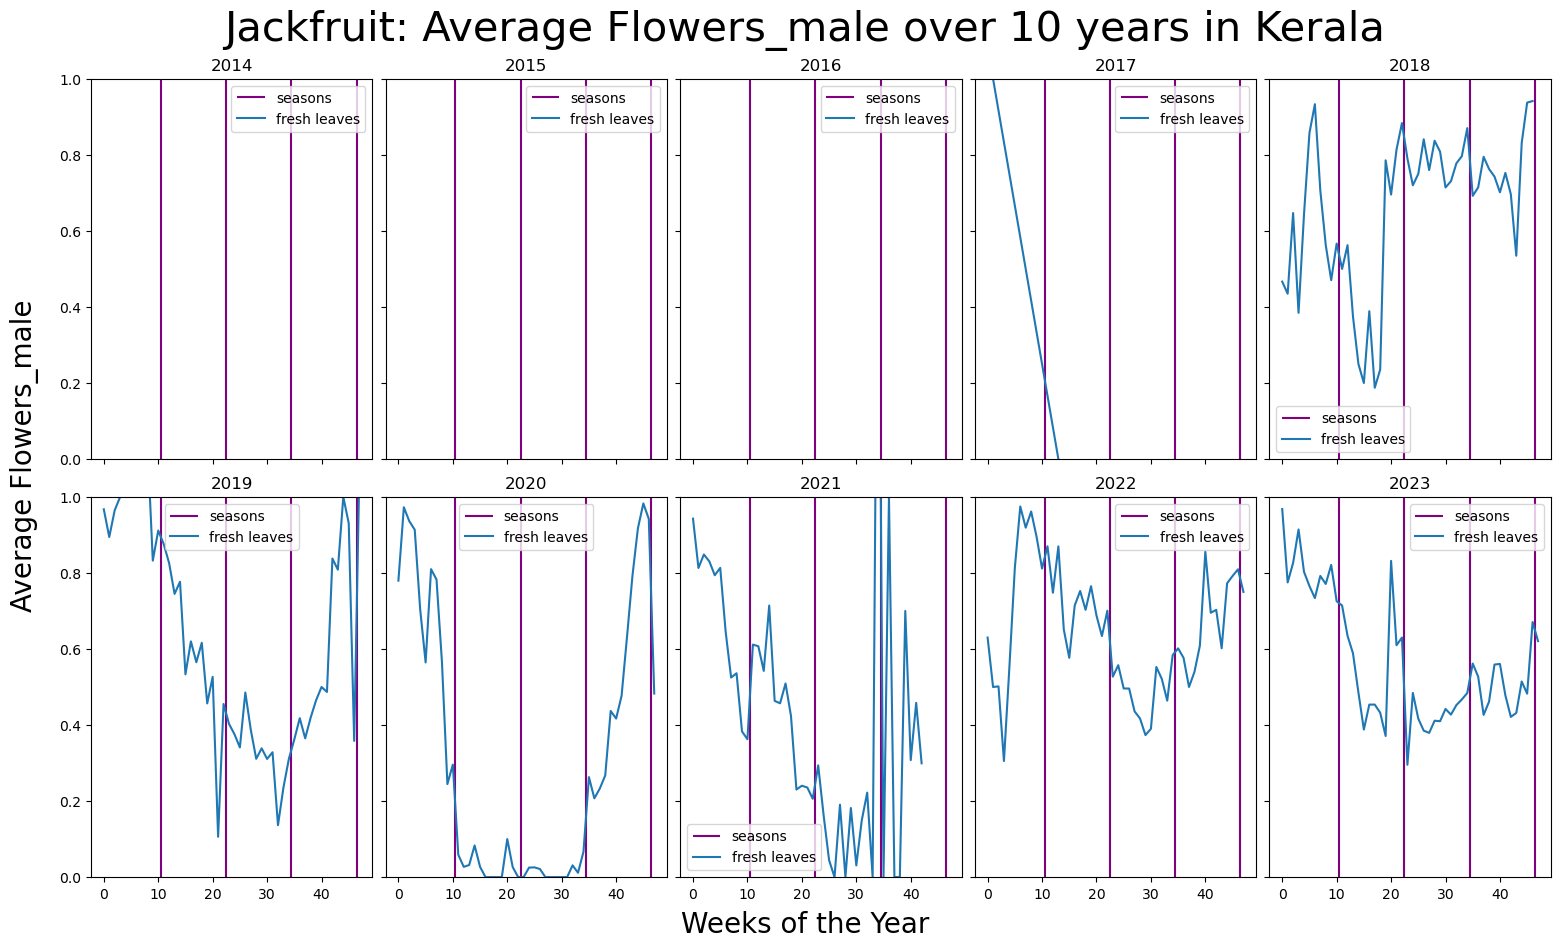

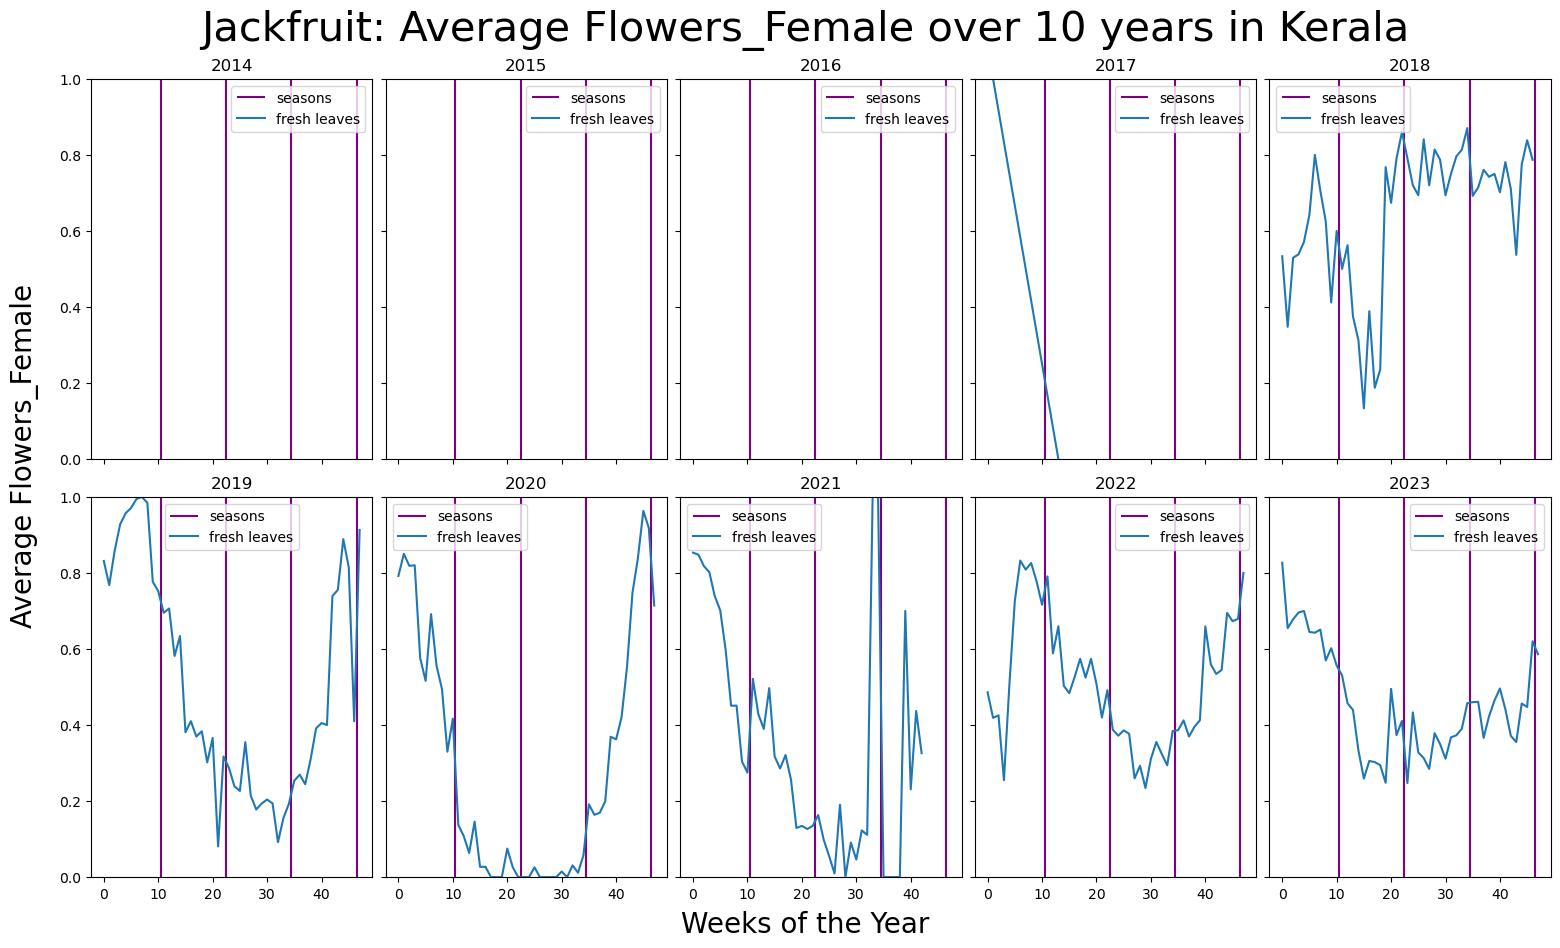

In [274]:
jack_df = kerala_df[kerala_df['Species_name'] == 'Jackfruit- Artocarpus heterophyllus']
for feature in jack_df.columns[2:-2]:
    fig, ax = plt.subplots(2, 5, sharex=True, sharey=True, constrained_layout=True, figsize=(15, 9))
    for idx, year in enumerate(kerala_df['Year'].sort_values().unique()):
        plt.subplot(2, 5, idx+1)
        if feature in ['Flowers_Female','Flowers_male']:
            plt.ylim(bottom=0,top=1)
        else:
            plt.ylim(bottom=0,top=2)
        plt.vlines(x = solstices, ymin = 0, ymax = 2, colors = 'purple', label = 'seasons')
        try:
            year_df = jack_df[jack_df['Year'] == year]
        except:
            continue
        year_df = year_df[year_df[feature].isin([0,1,2])] # Getting rid of NA values
        year_df = year_df.sort_values('Week')
        plt.plot(np.sort(year_df['Week'].unique()), year_df.groupby(['Week'])[feature].mean(), label = 'fresh leaves')
        plt.legend()
        plt.title(year)
    fig.suptitle(f"Jackfruit: Average {feature} over 10 years in Kerala", fontsize=30)
    fig.text(0.5, -0.03, 'Weeks of the Year', ha='center', fontsize=20)
    fig.text(-0.03, 0.5, f'Average {feature}', va='center', rotation='vertical', fontsize=20)
    plt.show()

In [146]:
fig, ax = plt.subplots(2, 5, sharex=True, sharey=True, constrained_layout=True, figsize=(15, 9))
for idx, species in enumerate(kerala_df['Species_name'].value_counts().index[:10]):
    plt.subplot(2, 5, idx+1)
    species_df = kerala_df[kerala_df['Species_name'] == species]
    species_df = species_df.sort_values('Week')
    plt.plot(np.sort(species_df['Week'].unique()), species_df.groupby(['Week'])['Leaves_fresh'].mean())
    plt.title(re.sub('-.+','',species))
fig.suptitle(f"Average Leaves_fresh for Top 10 Prevalent Species in Kerala", fontsize=30)
#plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
fig.text(0.5, 0.04, 'Weeks of the Year', ha='center')
fig.text(0.04, 0.5, 'Average Leaves_fresh', va='center', rotation='vertical')
plt.xlabel('Weeks of the Year')
plt.ylabel('Average Leaves_fresh')
plt.show()

# Tasks
1. Push to GitHub
2. Explore -2 values in other attributes and later species
3. Look at google looker studio

In [ ]:
ref_kerala_df = pd.read_csv("citizen_data/kerala_citizenData.csv")
ref_kerala_df = pd.read_csv("reference_data/kerala_citizenData.csv")


<AxesSubplot:xlabel='Leaves_fresh'>

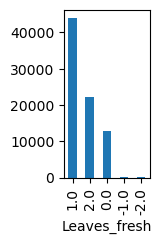

In [10]:
# Test
plt.subplot(2, 5, 1)
kerala_df[kerala_df['Species_name'] == 'Jackfruit- Artocarpus heterophyllus']['Leaves_fresh'].value_counts().plot.bar()
plt.subplot(2, 5, 1)
kerala_df[kerala_df['Species_name'] == 'Tamarind- Tamarindus indica']['Leaves_fresh'].value_counts().plot.bar()

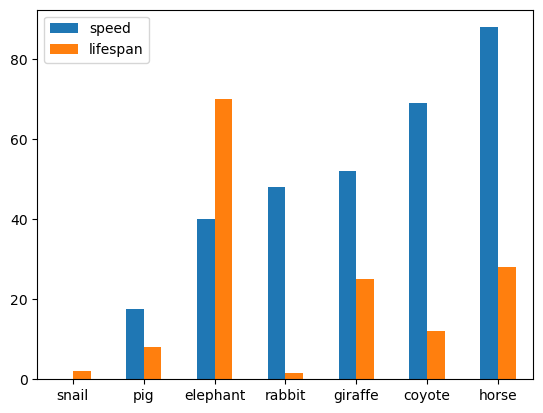

In [45]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

<AxesSubplot:>

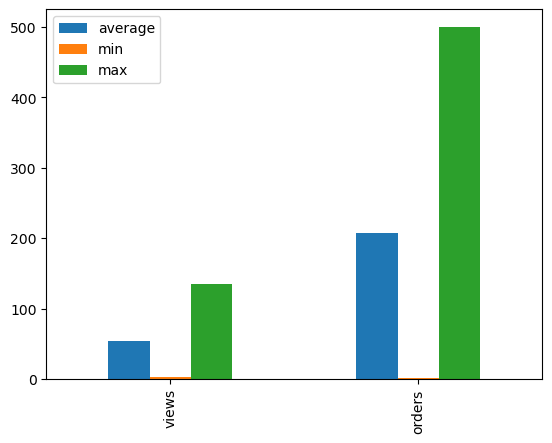

In [179]:
import pandas as pd

groups = [[23,135,3], [123,500,1]]
group_labels = ['views', 'orders']

# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=group_labels).T

# Plot.
pd.concat(
    [
        df.mean().rename('average'), 
        df.min().rename('min'), 
        df.max().rename('max')
    ],
    axis=1,
).plot.bar()

In [214]:
# Observations each year
for year in kerala_df['Year'].sort_values().unique():
    year_df = kerala_df[kerala_df['Year'] == year]
    print(year, len(year_df))

2014
15319
2015
30449
2016
33771
2017
33574
2018
68034
2019
100766
2020
48615
2021
40817
2022
60194
2023
55662
